In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-coordinates/world_coordinates.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv


In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [3]:
print('Last updated: ',datetime.now().strftime('%Y-%m-%d %H:%M:%S UTC'))

Last updated:  2020-03-23 09:09:10 UTC


In [4]:
# Read the datasets
wc = pd.read_csv("../input/world-coordinates/world_coordinates.csv")
df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [5]:
# Drop duplicate entries, if any
df.drop_duplicates(inplace=True)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


In [6]:
# Remove columns not required for study
df.drop(['SNo','Last Update'], axis=1, inplace=True)
# Rename certain values
df.rename(columns={'ObservationDate':'Date'}, inplace=True)
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
df.head()

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [7]:
# List of affected provinces/states
aff_ps = df['Province/State'].unique()
print(aff_ps)
print("Total:", len(aff_ps))

['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei'
 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau'
 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan'
 'Taiwan' 'Tianjin' 'Tibet' 'Washington' 'Xinjiang' 'Yunnan' 'Zhejiang'
 nan 'Chicago' 'Illinois' 'California' 'Arizona' 'Ontario'
 'New South Wales' 'Victoria' 'British Columbia' 'Bavaria' 'Queensland'
 'Chicago, IL' 'South Australia' 'Boston, MA' 'Los Angeles, CA'
 'Orange, CA' 'Santa Clara, CA' 'Seattle, WA' 'Tempe, AZ' 'San Benito, CA'
 'Toronto, ON' 'London, ON' 'Madison, WI' 'Cruise Ship'
 'Diamond Princess cruise ship' 'San Diego County, CA' 'San Antonio, TX'
 'Ashland, NE' 'Travis, CA' 'From Diamond Princess' 'Lackland, TX' 'None'
 'Humboldt County, CA' 'Sacramento County, CA'
 'Omaha, NE (From Diamond Princess)' 'Travis, CA (From Diamond Princess)'
 'Lackland, TX (From Diamond Princess)'
 'Unassi

In [8]:
# Number of cases in each Province/State
case_ps = df.groupby('Province/State', as_index=False)[['Confirmed','Deaths','Recovered']].max()
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # Prevent truncation
    display(case_ps) # Maintain rich formatting by using display() instead of print()

,Province/State,Confirmed,Deaths,Recovered
0,"Montreal, QC",4.0,0.0,0.0
1,"Norfolk County, MA",2.0,0.0,0.0
2,Alabama,138.0,0.0,0.0
3,"Alameda County, CA",2.0,0.0,0.0
4,Alaska,21.0,0.0,0.0
5,Alberta,259.0,1.0,0.0
6,Anhui,990.0,6.0,984.0
7,Arizona,152.0,2.0,1.0
8,Arkansas,165.0,0.0,0.0
9,Aruba,8.0,0.0,0.0


In [9]:
# List of affected countries/regions
aff_c = df['Country/Region'].unique()
print(aff_c)
print("Total:", len(aff_c))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

In [10]:
# Number of cases in each Country/Region
case_c = df.groupby(['Country/Region', 'Date']).sum().reset_index()
case_c = case_c.sort_values('Date', ascending=False)
case_c = case_c.drop_duplicates(subset = ['Country/Region'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(case_c.sort_values('Country/Region')[['Country/Region','Confirmed','Deaths','Recovered']].reset_index(drop=True))

,Country/Region,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,40.0,1.0,1.0
3,Albania,89.0,2.0,2.0
4,Algeria,201.0,17.0,65.0
5,Andorra,113.0,1.0,1.0
6,Angola,2.0,0.0,0.0
7,Antigua and Barbuda,1.0,0.0,0.0
8,Argentina,225.0,4.0,3.0
9,Armenia,194.0,0.0,2.0


In [11]:
# Total number of cases
print("Total Confirmed:",case_c['Confirmed'].sum())
print("Total Deaths:",case_c['Deaths'].sum())
print("Total Recovered:",case_c['Recovered'].sum())

Total Confirmed: 336018.0
Total Deaths: 14634.0
Total Recovered: 97883.0


Text(0, 0.5, 'Number of cases')

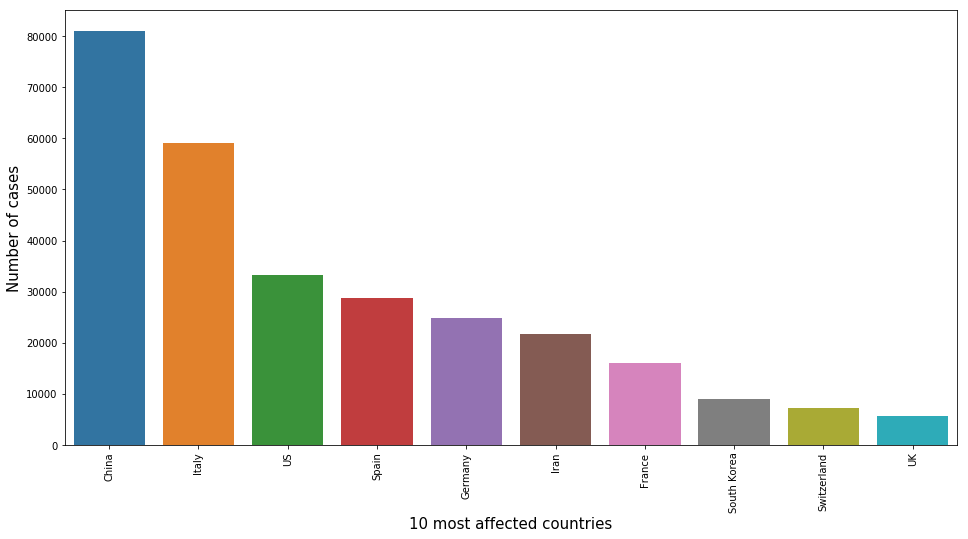

In [12]:
# Plot top 10 countries with confirmed cases
plt.rcParams['figure.figsize']=(16,8)
sns.barplot(x='Country/Region', y='Confirmed', data=case_c.nlargest(10,'Confirmed'))
plt.xticks(rotation=90)
plt.xlabel('10 most affected countries',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)

Text(0, 0.5, 'Number of cases')

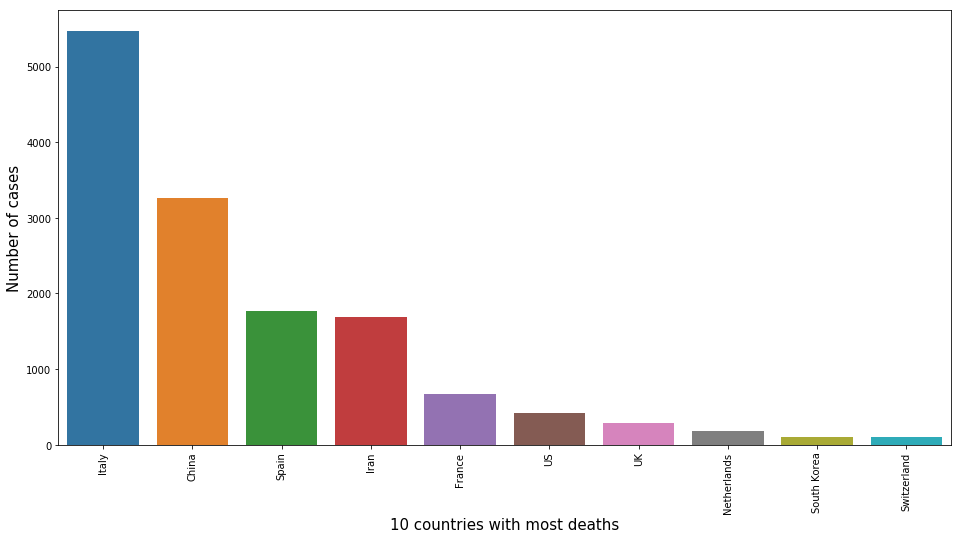

In [13]:
# Plot top 10 countries with death cases
plt.rcParams['figure.figsize']=(16,8)
sns.barplot(x='Country/Region', y='Deaths', data=case_c.nlargest(10,'Deaths'))
plt.xticks(rotation=90)
plt.xlabel('10 countries with most deaths',fontsize=15)
plt.ylabel('Number of cases',fontsize=15)

In [14]:
# Time-series analysis
df_date = df.groupby('Date', as_index=False)[['Confirmed','Deaths','Recovered']].sum()

# If Timestamp is required, run the following code
# df['Timestamp'] = pd.to_datetime(df['Date']).astype(int)/10**10

# If data-time is given, convert to date format
# df_date['Date'] = pd.to_datetime(df_date['Date']).dt.date

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_date)

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
5,01/27/2020,2927.0,82.0,61.0
6,01/28/2020,5578.0,131.0,107.0
7,01/29/2020,6165.0,133.0,126.0
8,01/30/2020,8235.0,171.0,143.0
9,01/31/2020,9925.0,213.0,222.0


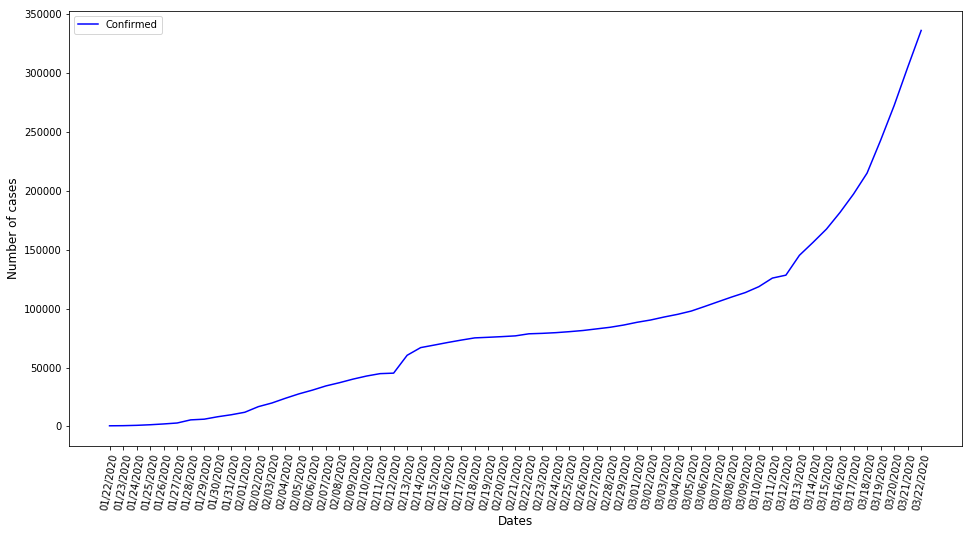

In [15]:
# Plot the confirmed cases
plt.plot('Date', 'Confirmed', data=df_date.groupby(['Date']).sum().reset_index(), color='blue')
plt.xticks(rotation=80)
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Number of cases',fontsize=12)
plt.legend()
plt.rcParams['figure.figsize']=(16,8)
plt.show()

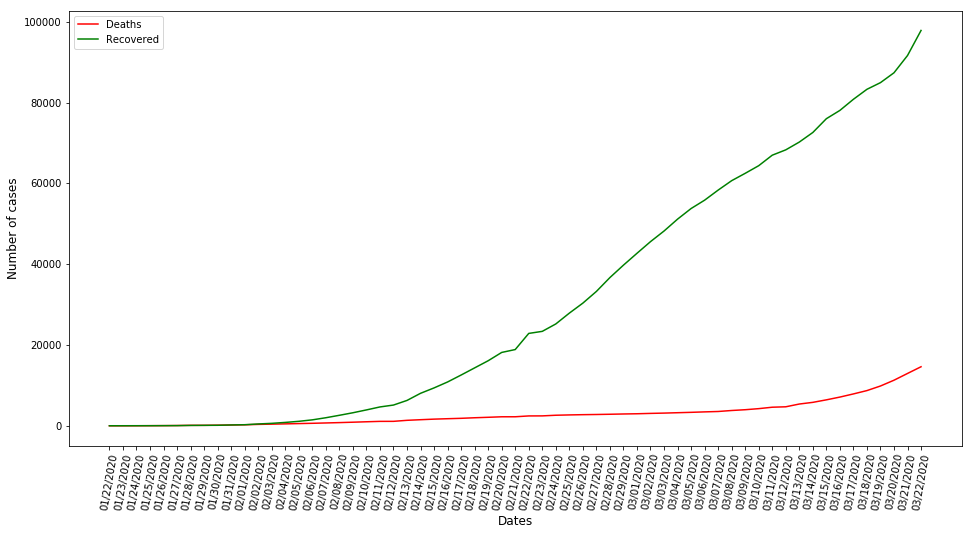

In [16]:
# Plot the deaths & recoveries
plt.plot('Date', 'Deaths', data=df_date.groupby(['Date']).sum().reset_index(), color='red')
plt.plot('Date', 'Recovered', data=df_date.groupby(['Date']).sum().reset_index(), color='green')
plt.xticks(rotation=80)
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Number of cases',fontsize=12)
plt.legend()
plt.rcParams['figure.figsize']=(16,8)
plt.show()

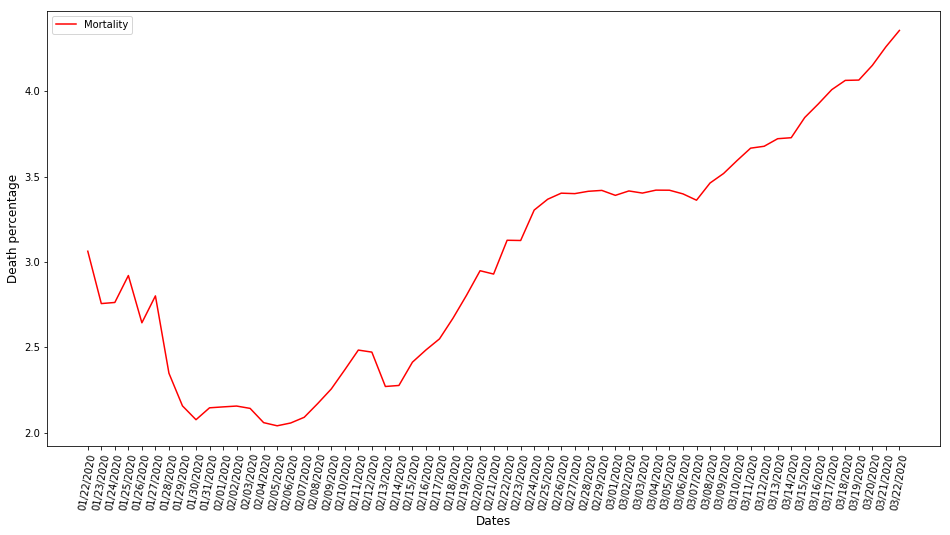

In [17]:
# Plot mortality rate
df_date['Mortality']=df_date.apply(lambda x: (x['Deaths']/x['Confirmed'])*100, axis=1)
plt.plot('Date', 'Mortality', data=df_date, color='red')
plt.xticks(rotation=80)
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Death percentage',fontsize=12)
plt.legend()
plt.rcParams['figure.figsize']=(16,8)
plt.show()

In [18]:
# Merge world coordinates with covid_19 dataframe
case_c.rename(columns={'Country/Region':'Country'}, inplace=True)
wc_df = pd.merge(wc,case_c,on='Country') # Might not be an exact match due to unequal data
wc_df.drop(['Code','Date','Deaths','Recovered'], axis=1, inplace=True)

In [19]:
# Heatmap using Folium
heatmap = folium.Map(location=[38.963745, 35.243322], zoom_start=2)

heat_data = [[row['latitude'],row['longitude'],row['Confirmed']] for index, row in wc_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heatmap)

# Display the map
heatmap